In [2]:
pip install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [4]:
dataset_path = r"data\prepared_music_lifestyle_data.csv"

In [5]:
music_and_lifestyle_df = pd.read_csv(dataset_path)

In [6]:
all_our_genres = []

Overwrite values in music_taste column from str type, to list

In [7]:
music_and_lifestyle_df['music_taste'] = [ast.literal_eval(row_str) for row_str in music_and_lifestyle_df['music_taste']]

Get a list of all our genres

In [8]:
for row in music_and_lifestyle_df['music_taste']:
    for each_genre in row:
        if each_genre not in all_our_genres:
            all_our_genres.append(each_genre)

In [9]:
def most_pop_genres_amongst_subset(subset_column):
    all_subset = []
    for subset_item in music_and_lifestyle_df[subset_column]:
        if subset_item not in all_subset:
            all_subset.append(subset_item)
    most_common_genre_per_subset_item = {}
    for subset_item in all_subset:
        recurrence_of_genres_here = {}
        subset_at_subset_item = music_and_lifestyle_df.loc[music_and_lifestyle_df[subset_column] == subset_item]
        for genre_list in subset_at_subset_item['music_taste']:
            for item in genre_list:
                if item in recurrence_of_genres_here:
                    recurrence_of_genres_here[item] += recurrence_of_genres_here[item]
                else:
                    recurrence_of_genres_here[item] = 1
        max_value = max(recurrence_of_genres_here.values())
        max_key = [key for key in recurrence_of_genres_here if recurrence_of_genres_here[key] == max_value]
        most_common_genre_per_subset_item[subset_item] = max_key
    return most_common_genre_per_subset_item

In [10]:
def get_dataset_x_against_y(xlist, xcol_title, ylist, ycol_title):
    data = []
    for x in xlist:
        x_dict = {xcol_title: x}
        y_count = 0
        subset_with_x = music_and_lifestyle_df[music_and_lifestyle_df[xcol_title].apply(lambda z: x in z)]
        for y in ylist:
            subset_with_x_and_y = subset_with_x.loc[subset_with_x[ycol_title].str.contains(y) == True]
            y_count = subset_with_x_and_y.shape[0]
            x_dict[y] = y_count
        data.append(x_dict)
    x_against_y_df = pd.DataFrame.from_dict(data)
    return x_against_y_df

In [13]:
def main():

    # QUESTION
    # Which music genres are most common in the different areas of London?
    most_common_genre_per_london_zone = most_pop_genres_amongst_subset('london_address')
    print("\n\nThe most common music genres amongst CTA'ers in each London zone are the following:\n")
    for key in most_common_genre_per_london_zone: 
        print(f"In {key}, people tend to listen to {most_common_genre_per_london_zone[key]}.\n")

    # QUESTION
    # Which music genres are most common amongst people from different parts of the world?
    most_common_genre_worldwide = most_pop_genres_amongst_subset('home')
    print("\n\nThe most common genres amongst CTA'ers from different parts of the world are:\n")
    for key in most_common_genre_worldwide: 
        print(f"With people from {key}, their music taste tends to include these genres {most_common_genre_worldwide[key]}.\n")

    # QUESTION
    # Which music genres are most common amongst people with different hobbies/weekend_activities?
    all_hobbies = []
    for str_of_hobbies in music_and_lifestyle_df['hobbies_activities']:
        list_of_hobbies = str_of_hobbies.split(", ")
        for hobby in list_of_hobbies:
            if hobby not in all_hobbies:
                all_hobbies.append(hobby)
    most_common_genre_per_hobby = {}
    for hobby in all_hobbies:
        recurrence_of_genres_here = {}
        subset_with_hobby = music_and_lifestyle_df.loc[music_and_lifestyle_df['hobbies_activities'].str.contains(hobby) == True]
        for genre_list in subset_with_hobby['music_taste']:
            for item in genre_list:
                if item in recurrence_of_genres_here:
                    recurrence_of_genres_here[item] += recurrence_of_genres_here[item]
                else:
                    recurrence_of_genres_here[item] = 1
        max_value = max(recurrence_of_genres_here.values())
        max_key = [key for key in recurrence_of_genres_here if recurrence_of_genres_here[key] == max_value]
        most_common_genre_per_hobby[hobby] = max_key
    print("\n\nThe most common genres amongst CTA'ers with different hobbies are:\n")
    for key in most_common_genre_per_hobby: 
        print(f"Amongst people whose hobbies fall under the '{key}' category, their music taste tends to include these genres {most_common_genre_per_hobby[key]}.\n")

    # QUESTION
    # Which hobbies/weekend_activities have the most correlation with music taste? (Visualised using heatmap)
    genre_hobbies_df = get_dataset_x_against_y(all_our_genres, 'music_taste', all_hobbies, 'hobbies_activities')
    print(genre_hobbies_df)
    sns.heatmap(genre_hobbies_df.drop(['music_taste'], axis=1), yticklabels=all_our_genres, cmap ='RdYlGn', linewidths = 0.30) 
    plt.show()
    # OBSERVATION
    # As shown here, there is a strong correlation between people who like to do Social activities, and people who enjoy hip hop and rap. 
    # People who like pop music tend to like Sleep and/or Travel/Exploration

    # QUESTION
    # What about social_media against music_taste? (Heatmap)
    all_socials = []
    for str_of_socials in music_and_lifestyle_df['social_media']:
        list_of_socials = str_of_socials.split(", ")
        for social in list_of_socials:
            if social not in all_socials:
                all_socials.append(social)
    genre_socials_df = get_dataset_x_against_y(all_our_genres, 'music_taste', all_socials, 'social_media')
    sns.heatmap(genre_socials_df.drop(['music_taste'], axis=1), yticklabels=all_our_genres, cmap ='RdYlGn', linewidths = 0.30) 
    plt.show()
    # OBSERVATION
    # The data suggests there is a strong correlation between WhatsApp and Instagram use, and having a taste for rap music. 
    # The same correlation is shown between the same two social media platforms and pop music. 
    # There is a moderate correlation between YouTube users and dance pop fans, which is interesting to learn.

# QUESTION
    # Social_media against hobbies/weekend_activities? (Heatmap)
    genre_socials_hobbies_df = get_dataset_x_against_y(all_socials, 'social_media', all_hobbies, 'hobbies_activities')
    sns.heatmap(genre_socials_hobbies_df.drop(['social_media'], axis=1), yticklabels=all_socials, cmap ='RdYlGn', linewidths = 0.30) 
    plt.show()
    # OBSERVATION
    # From observing the data, we can see that people who enjoy doing 'Fun' activities (e.g. gaming, watching TV, listening to live music and attending concerts)
    # tend to use Instagram and Whatsapp
    # People who enjoy Travel/Exploration tend to use Instagram
    # People who enjoy Learning/Creative Practise/Working tend to watch YouTube
    # There is minimal correlation observed amongst people who use social media platforms such as Discord, Messenger and WeChat, possibly due to a lack of data
    pass



The most common music genres amongst CTA'ers in each London zone are the following:

In E, people tend to listen to ['hip hop', 'rap', 'ohio hip hop', 'pop rap'].

In W, people tend to listen to ['alternative r&b', 'escape room', 'trap queen', 'dance pop', 'pop', 'chilean indie', 'chilean rock'].

In N, people tend to listen to ['permanent wave', 'pop', 'r&b', 'rap'].

In S, people tend to listen to ['conscious hip hop', 'hip hop', 'rap', 'west coast rap', 'trap queen', 'modern rock', 'nottingham indie', 'amapiano', 'pop', 'r&b', 'movie tunes', 'motown', 'soul', 'k-indie', 'korean indie rock', 'indie soul', 'indietronica', 'uk contemporary r&b', 'k-pop', 'korean r&b', 'k-rock'].



The most common genres amongst CTA'ers from different parts of the world are:

With people from Hackney, their music taste tends to include these genres ['conscious hip hop', 'hip hop', 'rap', 'west coast rap', 'ohio hip hop', 'pop rap', 'chicago rap'].

With people from UK, their music taste tends to incl

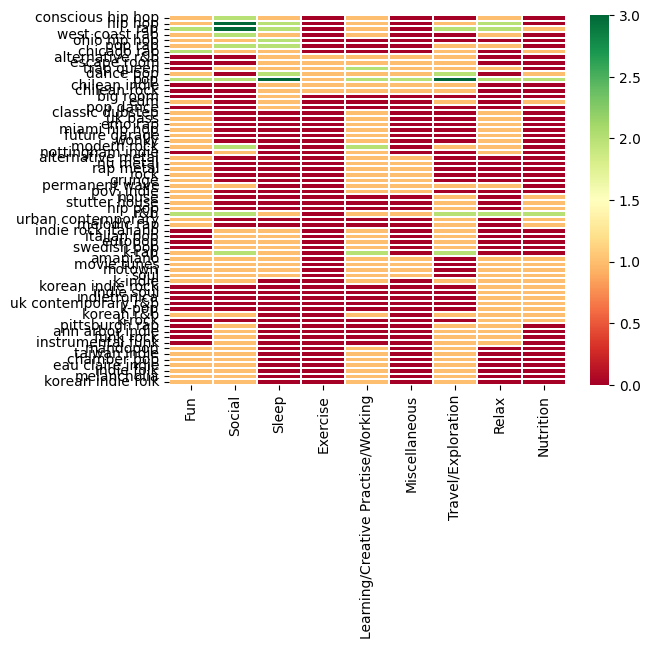

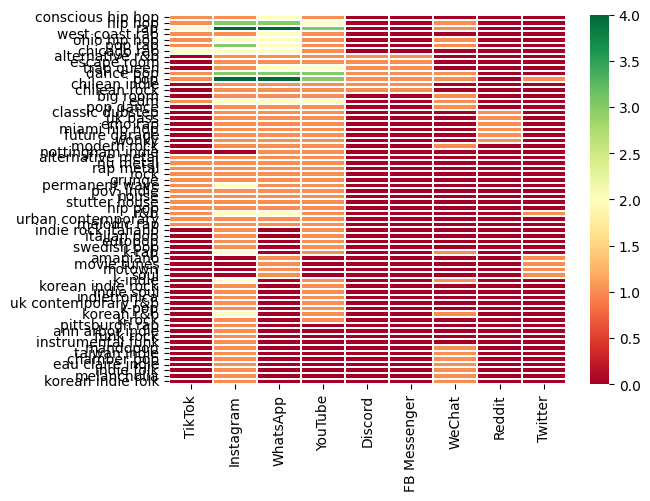

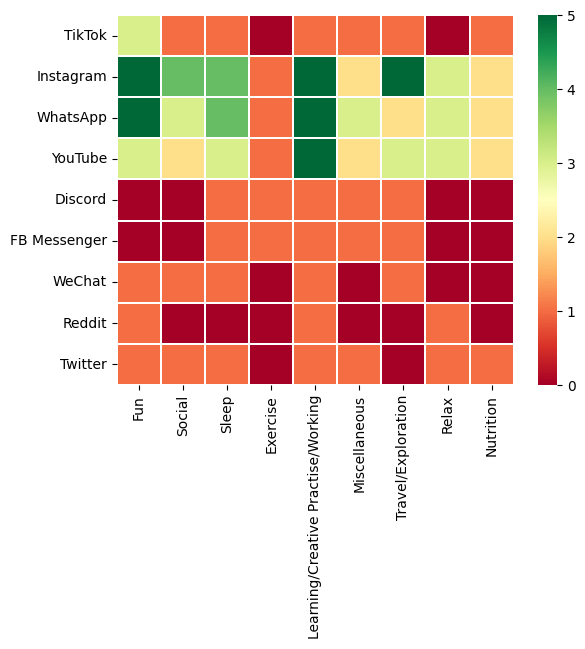

In [14]:
if __name__ == '__main__':
    main()